# Cashflows package use-cases

By: **Rodrigo Hernandez Mota**

In [1]:
%matplotlib inline
from cashflows import CashFlow, CashFlowStream

## Definition and examples

### Cashflow

A cashflow is defined as a monetary quantity fixed on a given time. This monetary quantity can be of the following nature: 
* **Inflow**: whenever the investor received money.
* **Outflow**: whenever the investor is required to give money away.

Let say we have $M$ monetary units. Then an inflow would be represented as $M$ and an outflow as $-M$. Selecting the nature of this quantity and defining a realization time, say $t=t_0$ it's essential to generate a cashflow.

Therefore, a cashflow instance has a monetary value and fixed time. 

#### OPERATIONS


**Attributes**

Given a well defined cashflow $A$ we can peek its attributes by performing:

* Time attribute: $A.time$
* Monetary units attribute: $A.value$

**Add operation**

If a cashflow $B$ its defined such that $A.time = B.time$ then the **add** operation can be performed.

$$C = A + B$$

Where:
* $C.time = A.time = B.time$
* $C.value = A.value + B.value$

**Scale operation**

Given a scalar $r$ the **scale** operation states that:

$$C = rA$$

Where:
* $C.time = A.time$
* $C.value = r * A.value$

The programming examples use methods to perform the special operations among cashflows. 

In [7]:
r = 0.75
A = CashFlow(value=10, time=1)
B = CashFlow(value=-7, time=1)
C = CashFlow(value=20, time=0)

print(str(A))
print(str(B))

Flow(type: inflow, time: 1, value: 10.0, currency: mxn)
Flow(type: outflow, time: 1, value: 7.0, currency: mxn)


In [6]:
# Add operation
C = A.add(B)

print(str(C))

Flow(type: inflow, time: 1, value: 3.0, currency: mxn)


In [11]:
# Add operation performed with uncompatible cashflows.
try:
    A.add(D)
except ValueError:
    print("This A.add(D) generates an error.")

This A.add(D) generates an error.


In [9]:
# Scale operation
C = A.scale(r)
print(str(C))

Flow(type: inflow, time: 1, value: 7.5, currency: mxn)


#### PROPERTIES

These properties arise for any set of cashflows corresponding to the same time value.

**Commutative property**

$$A + B = B + A$$

**Associative property**

$$(A + B) + C = A + (B + C)$$

**Distributive property**

$$r(A + B) = rA + rB$$

**Associative property scalar**

$$r(sA) = (rs)A$$

**Distributive property scalar**

$$(r + s)A = rA + sA$$


**Null or Empty**

The empty cashflow is defined as the cashflow with value of zero for any given time.

$$A + Empty = A$$

**Negation**

$$A + A.neg = Empty$$




In [25]:
r = 5
s = 3
A = CashFlow(value=10, time=1)
B = CashFlow(value=-7, time=1)
C = CashFlow(value=20, time=1)
Empty = CashFlow(value=0, time=1)

In [17]:
# Commutative property
A.add(B) == B.add(A)

True

In [18]:
# Associative property
(A.add(B)).add(C) == A.add(B.add(C))

True

In [22]:
# Distributive property
(A.add(B)).scale(r) == A.scale(r).add(B.scale(r))

True

In [23]:
# Associative property scalar
A.scale(s).scale(r) == A.scale(r*s)

True

In [24]:
# Distributive property scalar
A.scale(r + s) == A.scale(r).add(A.scale(s))

True

In [26]:
# Null or Empty
A.add(Empty) == A

True

In [28]:
# Negation
A.add(A.scale(-1)) == Empty

True

### Cashflow Stream

A stream of cashflows on its essence is a collection of individual non-compatible by time cashflows usually generated by a common financial asset. 

Let the core of a cashflow-stream $A$ be defined as:

$$A_c = (C_0, C_1, C_2, ..., C_n)$$

Where $C_i$ represents a cashflow with time-attribute i. 

Basic operations are defined among cashflow-streams in order to provide a basis to solve complex problems.

#### OPERATIONS

**Attributes**

A well define cashflow-stream has the following attributes:
* $A.length$: number of cashflows in the stream.
* $A.order$: max time-attribute in the stream.
* $A.flows$: list containing the iindividual non-compatible by time cashflows.

**Add operation**

Let $B$ be a well-defined cashflow-series of any order and lenght.

$$C = A + B$$

Where:
* $(C.flows)_t = (A.flows)_t + (B.flows)_t$ for each $t \leq max(A.order, B.order)$.

**Scale operation**

Let $r$ be a scalar. 

$$C = rA$$

Where:
* $C.flows = [r * a_i]$ where $a_i$ represents each elements of $A.flows$.

In [37]:
time_range = (0, 10)
value_range = (10, 100)
r = 5
A = CashFlowStream(time_type="int")
B = CashFlowStream(time_type="int")

A.random_initialization(n=5, time_range=time_range, value_range=value_range)
B.random_initialization(n=4, time_range=time_range, value_range=value_range)

In [39]:
# Add operation
C = A.add(B)
for stream in [A, B, C]:
    print(str(stream))

{
	Flow(type: inflow, time: 2, value: 6.0, currency: mxn)
	Flow(type: outflow, time: 3, value: 57.0, currency: mxn)
	Flow(type: outflow, time: 0, value: 63.0, currency: mxn)
	Flow(type: outflow, time: 1, value: 44.0, currency: mxn)
}
{
	Flow(type: inflow, time: 1, value: 63.0, currency: mxn)
	Flow(type: inflow, time: 9, value: 27.0, currency: mxn)
	Flow(type: outflow, time: 7, value: 40.0, currency: mxn)
}
{
	Flow(type: inflow, time: 2, value: 6.0, currency: mxn)
	Flow(type: outflow, time: 3, value: 57.0, currency: mxn)
	Flow(type: outflow, time: 0, value: 63.0, currency: mxn)
	Flow(type: inflow, time: 1, value: 19.0, currency: mxn)
	Flow(type: inflow, time: 9, value: 27.0, currency: mxn)
	Flow(type: outflow, time: 7, value: 40.0, currency: mxn)
}


In [41]:
# Scale operation
C = A.scale(r)

print(str(C))

{
	Flow(type: inflow, time: 2, value: 30.0, currency: mxn)
	Flow(type: outflow, time: 3, value: 285.0, currency: mxn)
	Flow(type: outflow, time: 0, value: 315.0, currency: mxn)
	Flow(type: outflow, time: 1, value: 220.0, currency: mxn)
}


#### PROPERTIES
These properties arise for interactio among cashflow-streams.

**Commutative property**

$$A + B = B + A$$

**Associative property**

$$(A + B) + C = A + (B + C)$$

**Distributive property**

$$r(A + B) = rA + rB$$

**Associative property scalar**

$$r(sA) = (rs)A$$

**Distributive property scalar**

$$(r + s)A = rA + sA$$


**Null or Empty**

The empty cashflow is defined as the cashflow with value of zero for any given time.

$$A + Empty = A$$

**Negation**

$$A + A.neg = Empty$$



In [64]:
time_range = (0, 10)
value_range = (10, 100)
r = 5
s = 3
A = CashFlowStream(time_type="int")
A.random_initialization(n=5, time_range=time_range, value_range=value_range)
B = CashFlowStream(time_type="int")
B.random_initialization(n=4, time_range=time_range, value_range=value_range)
C = CashFlowStream(time_type="int")
C.random_initialization(n=6, time_range=time_range, value_range=value_range)
Empty = CashFlowStream(time_type="int")

In [57]:
# Commutative property
A.add(B) == B.add(A)

True

In [58]:
# Associative property
(A.add(B)).add(C) == A.add(B.add(C))

True

In [61]:
# Distributive property
(A.add(B)).scale(r) == A.scale(r).add(B.scale(r))

True

In [62]:
# Associative property scalar r(sA) = (rs)A
(A.scale(s)).scale(r) == A.scale(r * s)

True

In [63]:
# Distributive property scalar (r + s)A = rA + sA
A.scale(r + s) == A.scale(r).add(A.scale(s))

True

In [65]:
# Null or Empty A + Empty = A
A.add(Empty) == A

True

In [66]:
# Negation
A.add(A.neg()) == Empty

True

In [72]:
A = CashFlowStream("int")
A.put(time=0, value=-100)
A.put(time=1, value=50)
A.put(time=2, value=20)
A.put(time=3, value=20)
A.put(time=4, value=20)
A.put(time=5, value=10)

A.get_irr(percentage=False)

0.084067

In [74]:
B = CashFlowStream("int")
B.put(time=0, value=-100)
B.put(time=1, value=50)
B.put(time=2, value=20)
B.put(time=3, value=20)
B.put(time=4, value=20)
B.put(time=6, value=10*(1+A.get_irr(percentage=False)**1))
B.get_irr(percentage=False)

0.084067

In [75]:
A == B

False

In [77]:
A.get_npv(rate=0.1)

TypeError: unsupported operand type(s) for /: 'CashFlow' and 'float'

We start by importing the CashFlow class from the package and creating an instance.

In [1]:
%matplotlib inline
from cashflows import CashFlow

In [ ]:
cash_flow = CashFlow(time_type="int")

This class serves as a handler of individual cashflows. Let's assume an investor begins with an outgoing cashflow of 100 bitcoin units at time 0.

In [4]:
cash_flow.add(
    flow_type="outflow",
    value=100,
    time=0,
    currency="BTC"
)

print(cash_flow.to_string())

{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
}


As it can be seen, the key parameters for a "flow" are:
* **flow_type**: Whether its an "outflow" (i.e. when the investor pays cash) or an "inflow" (i.e. when the investor receives cash).
* **time**: Arbitrary time representing the "position" of the investment. Must be integer.
* **value**: Number of currency units.
* **currency**: Currency denomination.

An ingoing flow of 20 BTC at 2 time units will be represented as:

In [5]:
cash_flow.add(
    flow_type="inflow",
    value=20,
    time=2,
    currency="BTC"
)

print(cash_flow.to_string())

{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 20.0, currency: BTC)
}


## Adding cash flows

We can add arbitrary cashflows at any time. 

In [6]:
cash_flow.add(
    flow_type="inflow",
    value=50,
    time=3,
    currency="BTC"
)

cash_flow.add(
    flow_type="outflow",
    value=10,
    time=4,
    currency="BTC"
)

print(cash_flow.to_string())

{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 20.0, currency: BTC)
	Flow(type: inflow, time: 3, value: 50.0, currency: BTC)
	Flow(type: outflow, time: 4, value: 10.0, currency: BTC)
}


Note the following in-going flow at time 5 for 40 BTC:

In [7]:

cash_flow.add(
    flow_type="inflow",
    value=40,
    time=5,
    currency="BTC"
)

print(cash_flow.to_string())

{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 20.0, currency: BTC)
	Flow(type: inflow, time: 3, value: 50.0, currency: BTC)
	Flow(type: outflow, time: 4, value: 10.0, currency: BTC)
	Flow(type: inflow, time: 5, value: 40.0, currency: BTC)
}


We can add another in-going flow at the same time (5) for another value (30). We should expect this flows to combine and generate a Flow at 5 for 70 BTC. 

In [8]:
cash_flow.add(
    flow_type="inflow",
    value=30,
    time=5,
    currency="BTC"
)

print(cash_flow.to_string())

{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 20.0, currency: BTC)
	Flow(type: inflow, time: 3, value: 50.0, currency: BTC)
	Flow(type: outflow, time: 4, value: 10.0, currency: BTC)
	Flow(type: inflow, time: 5, value: 70.0, currency: BTC)
}


We can modify at any time and the flows will adjust.

In [9]:
cash_flow.add(
    flow_type="inflow",
    value=15,
    time=2,
    currency="BTC"
)

cash_flow.add(
    flow_type="outflow",
    value=7,
    time=2,
    currency="BTC"
)

print(cash_flow.to_string())

{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 28.0, currency: BTC)
	Flow(type: inflow, time: 3, value: 50.0, currency: BTC)
	Flow(type: outflow, time: 4, value: 10.0, currency: BTC)
	Flow(type: inflow, time: 5, value: 70.0, currency: BTC)
}


A flow can change its type when combined with a grater flow.

In [10]:
cash_flow.add(
    flow_type="inflow",
    value=100,
    time=8,
    currency="BTC"
)

print(cash_flow.to_string())


cash_flow.add(
    flow_type="outflow",
    value=105,
    time=8,
    currency="BTC"
)


print(cash_flow.to_string())


{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 28.0, currency: BTC)
	Flow(type: inflow, time: 3, value: 50.0, currency: BTC)
	Flow(type: outflow, time: 4, value: 10.0, currency: BTC)
	Flow(type: inflow, time: 5, value: 70.0, currency: BTC)
	Flow(type: inflow, time: 8, value: 100.0, currency: BTC)
}
{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 28.0, currency: BTC)
	Flow(type: inflow, time: 3, value: 50.0, currency: BTC)
	Flow(type: outflow, time: 4, value: 10.0, currency: BTC)
	Flow(type: inflow, time: 5, value: 70.0, currency: BTC)
	Flow(type: outflow, time: 8, value: 5.0, currency: BTC)
}


## Plot representation

A flow can be plotted by assigning postitive values to the "inflows" and negative values to the "outflows". The x-axis corresponds to the timescale.

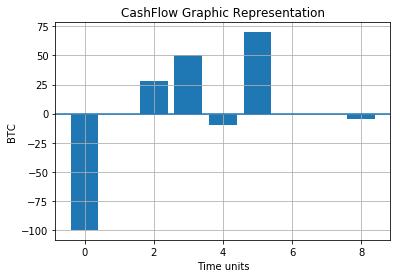

In [11]:
cash_flow.plot()

## Profitability

Profitability ratio is a measure that indicates the relation among the output flows and the input flows. An investor will prefer values > 1.


$$
profitability = \frac{\sum_i^n outflow_i }{\sum_j^m inflow_j }
$$

To get this value call the method *.get_profitability()*

In [12]:
print("The profitability ratio is of {}.".format(cash_flow.get_profitability()))

The profitability ratio is of 1.2869565217391303.


## Internal Return Rate

The IRR represent the rate at which the cash-flow structure adds value to the invested money. 

$$
\sum_{i=0}^n \frac{C_i}{(1+r)^i} = 0
$$

{note: add more theory}

In [13]:
print("The annual internal return rate is of {} %".format(cash_flow.get_irr()))

The annual internal return rate is of 8.395584 %


## Use dates

You can use a date time datatype for representing real case scenarios.

In [2]:
real_cashflow = CashFlow(time_type="date")

real_cashflow.add(flow_type="outflow", value=100, time="2018-01-01")
real_cashflow.add(flow_type="inflow", value=50, time="2020-01-01")
real_cashflow.add(flow_type="inflow", value=80, time="2022-01-01")
real_cashflow.add(flow_type="outflow", value=10, time="2022-01-01")

Same metrics are available using the xnpv and xirr functions (based on days).

In [14]:
res = "The profitability it's of %f with an IRR of %f percent." % (real_cashflow.get_profitability(), real_cashflow.get_irr())

print(res)

The profitability it's of 1.200000 with an IRR of 5.978710 percent.


Plot the cashflows with the x-axis as timestamp. 

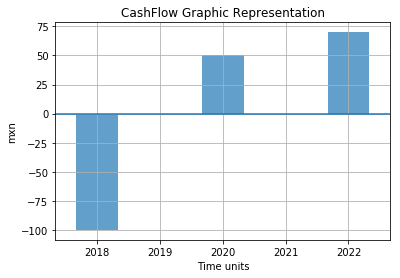

In [15]:
real_cashflow.plot()